# Diagnosing Heart Disease



## Contents:

- <b>1. Read Dataset </b>
    - Observing dataset
-  <b> 2. Data Cleaning </b>
    - 2.1 Outliers
    - 2.2 Uncorrelated Columns
    - 2.3 Filling null values
- <b> 3. Data Visulatization
- <b>4. Model Preparation </b>
    - 4.1 Encoding categorical features
    - 4.2 Normalization
    - 4.3 Split training and testing set
    
- <b>5 Models and tuning </b>
    - 5.1 Linear Regression
    - 5.2 Lasso Regression
    - 5.3 Multi-layer perceptron
    - 5.4 K-Nearest Neighbor
    - 5.5 Decision Tree
    - 5.6 Random Forest
    - 5.7 SVM
    - 5.8 XGBoost

We will follow the given outlies. 

# 1. Read Dataset

In [1403]:
import os
import pandas as pd

In [1404]:
path = "E:/MachineLearning/HeatDiseaseClassification/Dataset/"

In [1405]:
df = pd.read_csv(os.path.join(path,'heart.csv'))

In [1406]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Observing Datset

In [1407]:
df.shape

(303, 14)

In [1408]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


These datasets contains all types of shortforms. Let's reserach the features and it's importance for the dataset

In [1410]:
## Plotting a heatmap to observe correlation 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1411]:
corr = df.corr()

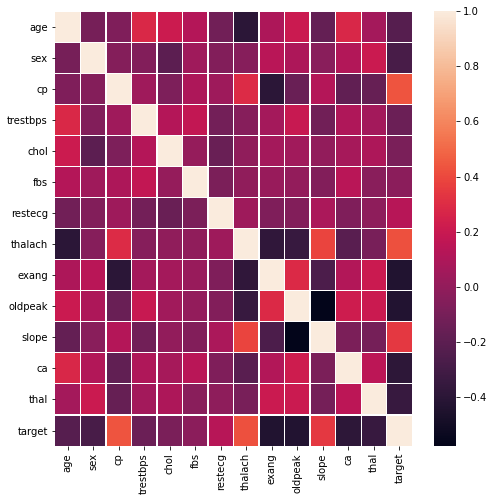

In [1412]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, ax= ax, linewidth = 0.1 );

As we can from the above diagram:
- <b> cp
- thalach
- slope
- restecg </b>

are the ones that are highly correlated. Anyway, let's reasearch more about the features and it roles for a Heart Disease.

### CP (Chest Pain): 

Since there are four type of Chest Pains. 
   - Typical Angina (1)
   - Atypical angina (2)
   - Non-anginal Pain (3)
   - Asymptomatic (0) 

In [1413]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### trestbps: 
Resting blood pressure (in mm Hg on admission to the hospital)

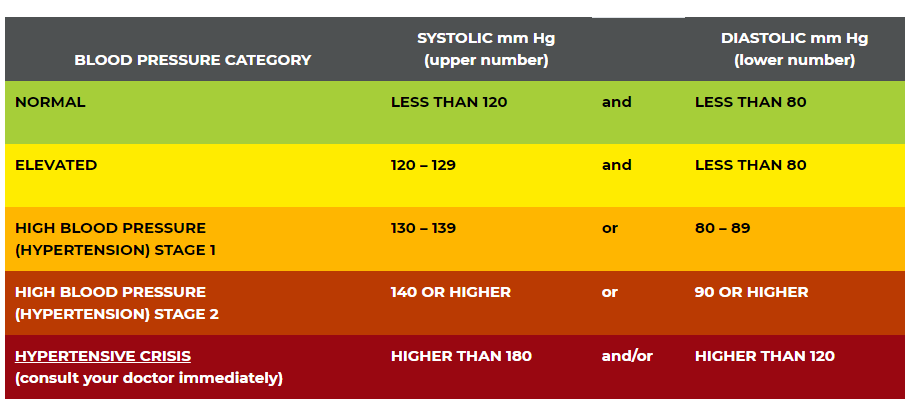

In [1414]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

### chol (Cholesterol)

Cholesterol is a type of fat found in your blood. Your liver makes cholesterol for your body. You also can get cholesterol from your foods you eat. 
When there is too much <b> cholesterol </b> in your blood, it builds up in the walls of your arteries, causing a process called <b> atherosclerosis, </b> a form of heart disease The person's cholesterol measurement in mg/dl

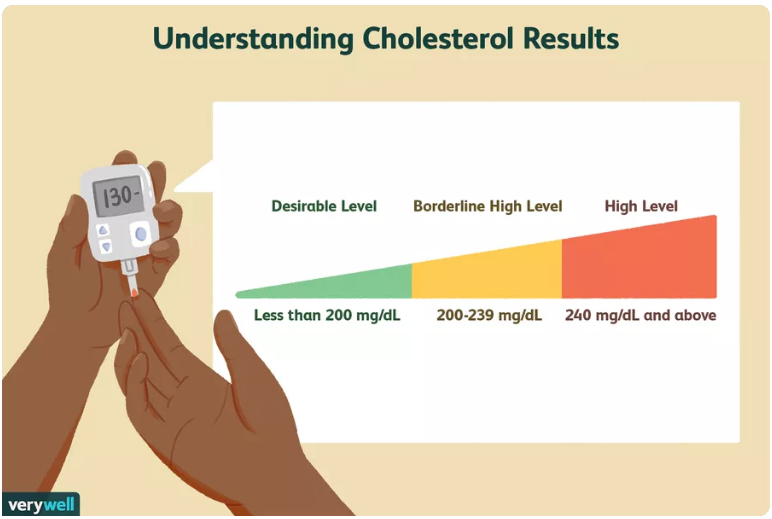

In [1415]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

### fbs (fasting blood sugar)

A fasting blood sugar level less than <b> 100 mg/dL (5.6 mmol/L) </b> is  <b> normal </b>. A fasting blood sugar level from <b> 100 to 125 mg/dL (5.6 to 6.9 mmol/L) </b> is considered prediabetes. If it's <b> 126 mg/dL (7 mmol/L) </b> or <b> higher </b> on two separate tests, you have diabetes.

In [1416]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

### restecg (resting electrocardiogram)

The resting electrocardiogram is a test that measures the electrical activity of the heart. The heart is a muscular organ which pumps blood through rhythmic contractions induced by electric impulses generated by the sinus node, the heat's natural pacemaker.

Electrocardiogram (ECG) to assess the heart rate and rhythm. This test can often detect heart disease, heart attack, an enlarged heart, or abnormal heart rhythms that may cause heart failure

<b> ( 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) 

In [1417]:
df['restecg'].describe()

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64

### thalach (Maximum Heart Rate Achieved)

In [1418]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

### exang (Exercise induced angina) 

Angina is a type of pain that occurs when not enough blood flows to the heart muscle. Angina may feel like pressure in the chest, jaw or arm. It frequently may occur with exercise or stress.
<b> (1 = Yes; 0 = no) </b>

In [1419]:
df['exang'].describe()

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64

### oldpeak (ST depression)

<b> ST-segment depression </b> is associated with a 100% increase in the occurrence of three-vessel/left main <b> disease </b> and to an increased risk of subsequent cardiac events.

In [1420]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

### slope 

the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [1421]:
df['slope'].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

### ca 

The number of major vessels (0-3)

In [1422]:
df['ca'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

### thal ( Thalassemia)

Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to cary oxygen.

Heart problems. Congestive heart failure and abnormal heart rhythms can be associated with severe thalassemia.

- 0 (dataset): null
- 1 (dataset): 6 = fixed defect 
- 2 (dataset): 3 = normal
- 3 (dataset) 7 = reversable defect

In [1423]:
df['thal'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

### target 

Heart disease (0 = no, 1 = yes)

In [1424]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

# 2. Data Cleaning
    2.1 Outliers
    2.2 Uncorrelated Columns
    2.3 Filling null values

### 2.1 Treating Outliers

In [1425]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1426]:
## Quickly checking on 'Chol'

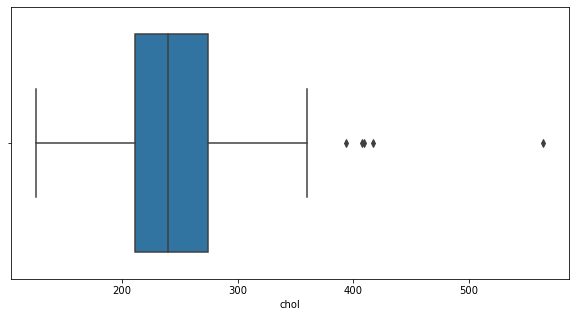

In [1427]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'chol', data = df);

As we can see there is one or more outlier, but it's not huge. Since our dataset is so small, it will not make any huge difference. 
Even though, to satisfy my curiosity I am going to train the model with both the dataset, with and without outlier.

In [1428]:
## let's clone our dataset

xdf = df.copy()

- <b> xdf : </b> The dataset will clean all outliers
- <b> df : </b> This dataset is with the outliers.

In [1429]:
## Lets clean the dataset

In [1430]:
Q1 = xdf['chol'].quantile(0.25)
Q3 = xdf['chol'].quantile(0.75)

IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

In [1431]:
filter = (xdf['chol'] >= min) & (xdf['chol'] <= max)
init_size = xdf.count()['chol']
xdf = xdf.loc[filter]
filtered_size = xdf.count()['chol']
print(init_size - filtered_size, '(', '{:.2f}'.format(100 * (init_size - filtered_size) / init_size), '%', ')', 'outliers removed from dataset')

5 ( 1.65 % ) outliers removed from dataset


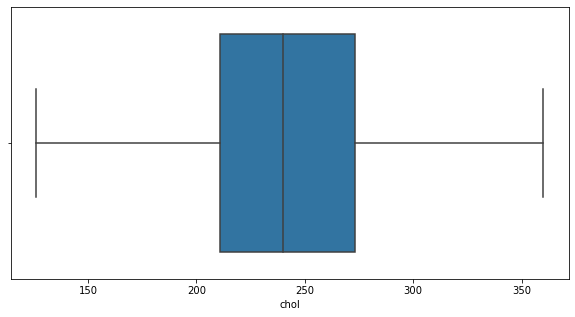

In [1432]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'chol', data = xdf);

### 2.2 Uncorrelated Columns

Since there are less columns. We will not be dropping any columns. 

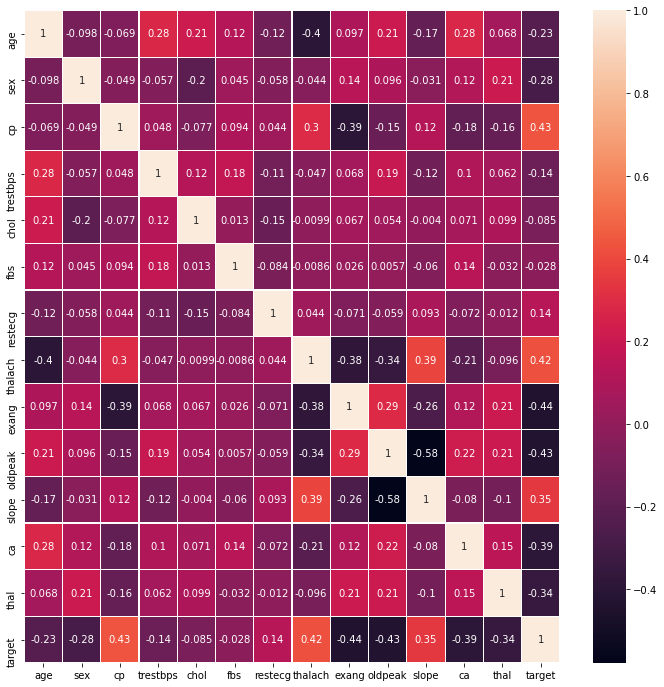

In [1433]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr, ax= ax, annot = True, linewidth = 0.1 );

From the above figure, we can see <b> exang </b>, <b> oldpeak </b>, <b> ca </b> and <b> thal </b> are less important to predict <b> target i.e heart disease </b>.

We will drop these features on new dataset <b> xdf </b> and we will test the accuracy with default dataset <b> df </b>

In [1434]:
df.shape

(303, 14)

In [1435]:
## Since it has less features we will not drop any featuers 

In [1436]:
xdf.shape

(298, 14)

### 2.1 Filling missing values 

In [1437]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*Noice* There are no nan values.

# 3. Data Visualization

Since Data Visulaization on numbers is difficult. We will replace all the numbers with labels. 

In [1438]:
dfvis = df.copy()

In [1439]:
## Sex

for i in dfvis['sex']:
    if i==0:
        dfvis['sex'] = dfvis['sex'].replace(0, "female")
    else:
        dfvis['sex'] = dfvis['sex'].replace(1, "male")


In [1440]:
## Cp

for i in dfvis['cp']:
    if i==0:
        dfvis['cp'] = dfvis['cp'].replace(0, "asymptomatic")
    elif i==1:
        dfvis['cp'] = dfvis['cp'].replace(1,"typical-angina")
    elif i==2:
        dfvis['cp'] = dfvis['cp'].replace(2,'atypical-angina')
    else:
        dfvis['cp'] = dfvis['cp'].replace(3,'non-anginal_pain')

In [1441]:
## fbs

for i in dfvis['fbs']:
    if i==0:
        dfvis['fbs'] = dfvis['fbs'].replace(0, "false")
    else:
        dfvis['fbs'] = dfvis['fbs'].replace(1, "true")

In [1442]:
## restecg

for i in dfvis['restecg']:
    if i==0:
        dfvis['restecg'] = dfvis['restecg'].replace(0, "false")
    else:
        dfvis['restecg'] = dfvis['restecg'].replace(1, "true")

In [1443]:
## exang

for i in dfvis['exang']:
    if i==0:
        dfvis['exang'] = dfvis['exang'].replace(0, "false")
    else:
        dfvis['exang'] = dfvis['exang'].replace(1, "true")

In [1444]:
## slope

for i in dfvis['slope']:
    if i==0:
        dfvis['slope'] = dfvis['slope'].replace(0, "down")
    elif i==1:
        dfvis['slope'] = dfvis['slope'].replace(1, "flat")
    else:
        dfvis['slope'] = dfvis['slope'].replace(2, "up")

In [1445]:
## thal

for i in dfvis['thal']:
    if i==0:
        dfvis['thal'] = dfvis['thal'].replace(0, 2)
    elif i==1:
        dfvis['thal'] = dfvis['thal'].replace(1, "fixed_defect")
    elif i==2:
        dfvis['thal'] = dfvis['thal'].replace(2, "normal")
    else:
        dfvis['thal'] = dfvis['thal'].replace(3, "reversible_defect")

In [1446]:
## target

for i in dfvis['target']:
    if i==0:
        dfvis['target'] = dfvis['target'].replace(0, "no")
    else:
        dfvis['target'] = dfvis['target'].replace(1, "yes")

In [1447]:
## target


In [1448]:
dfvis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal_pain,145,233,true,false,150,false,2.3,down,0,fixed_defect,yes
1,37,male,atypical-angina,130,250,false,true,187,false,3.5,down,0,normal,yes
2,41,female,typical-angina,130,204,false,false,172,false,1.4,up,0,normal,yes
3,56,male,typical-angina,120,236,false,true,178,false,0.8,up,0,normal,yes
4,57,female,asymptomatic,120,354,false,true,163,true,0.6,up,0,normal,yes


### Age

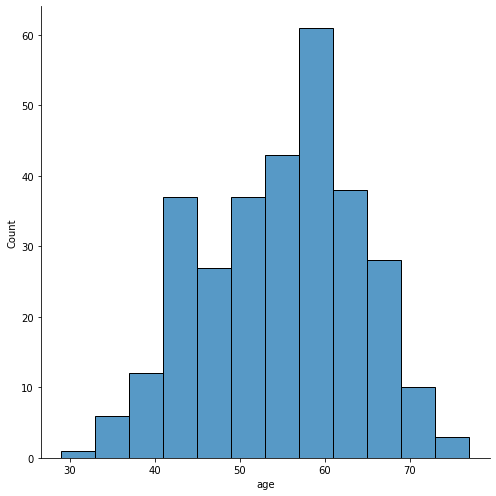

In [1449]:
sns.displot(x = 'age', data = dfvis,aspect = 1, height = 7);

Let's see it's relationship with <b> Target i.e Heart Disease </b>

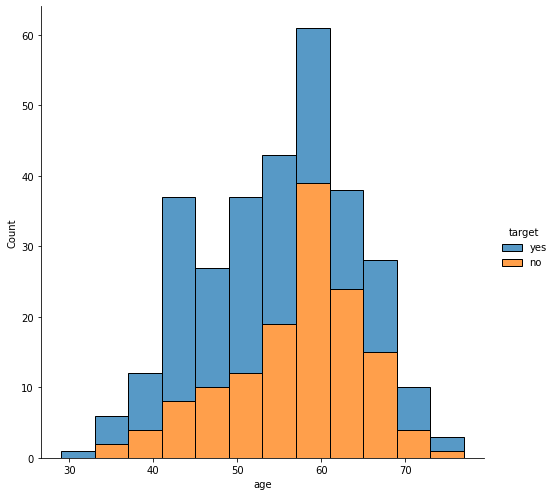

In [1450]:
sns.displot(x = 'age', data = dfvis,hue = 'target', multiple="stack", aspect = 1, height = 7);

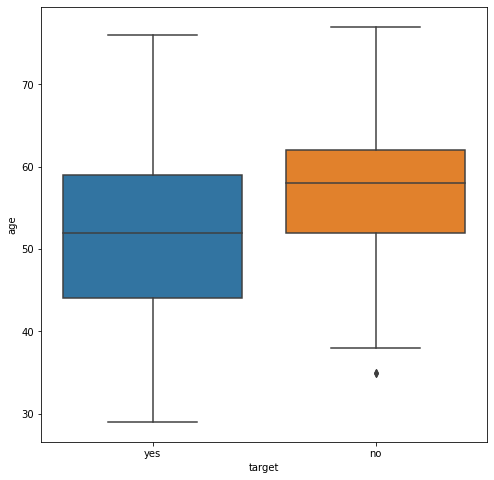

In [1451]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'age',x='target',  data = dfvis);

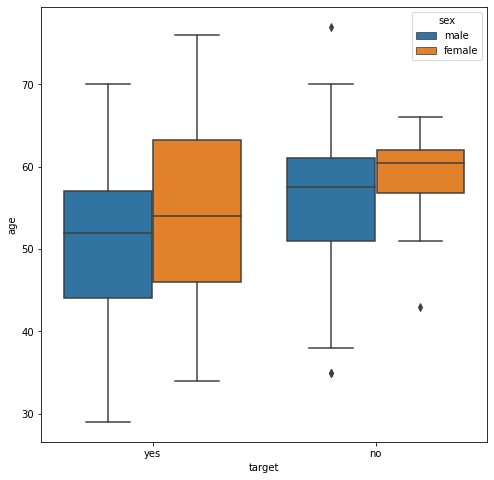

In [1452]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'age',x='target',hue = 'sex',  data = dfvis);

### Sex

(0 = Female, 1 = Male)

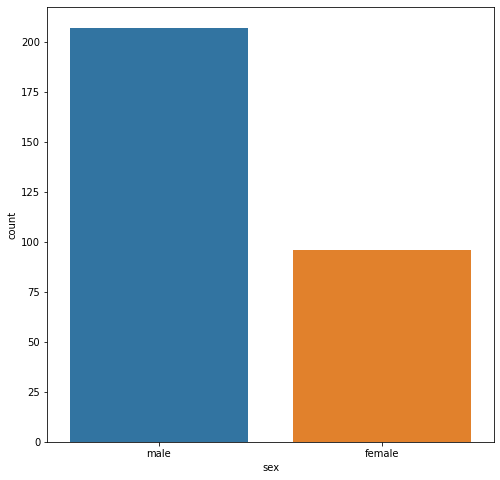

In [1453]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'sex', data = dfvis);

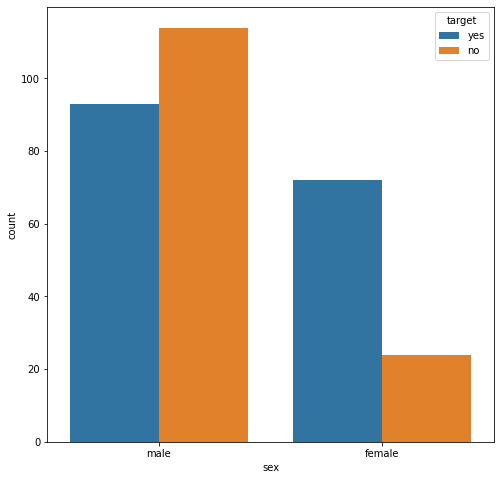

In [1454]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'sex', hue = 'target',data = dfvis);

target: yes = heart disease and no = no heart disease

(which indicates that, there are more number of <b> Males </b> than <b> Females </b>. Also, more <b> Males </b> are victim of heart disease than <b> Females. </b>

But as compared to total number of <b> Males </b> , less number of <b> Males </b> has <b> Heart diseases </b>

Also, largest number of <b>Females </b> has heart disease overall, on the total of <b> Females. </b>


In [1455]:
dfvis['sex'].shape

(303,)

In [1456]:
malecount = 0
for i in dfvis['sex']:
    if i=="male":
        malecount = malecount + 1

In [1457]:
print("There are:", malecount, " number of males which is : {:.2f} %".format((malecount/303)*100))

There are: 207  number of males which is : 68.32 %


In [1458]:
femalecount = 0
for i in dfvis['sex']:
    if i=="female":
        femalecount = femalecount + 1

In [1459]:
print("There are : {} total number of females which is : {:.2f}% ".format(femalecount, ((femalecount)/303)* 100))

There are : 96 total number of females which is : 31.68% 


### cp (chest pain)

In [1460]:
dfvis['cp'].value_counts()

asymptomatic        143
atypical-angina      87
typical-angina       50
non-anginal_pain     23
Name: cp, dtype: int64

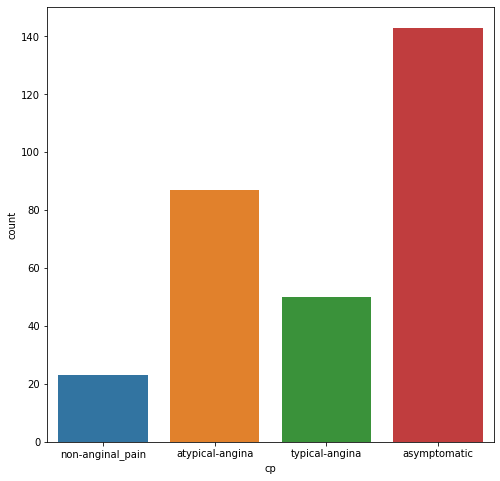

In [1461]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'cp', data = dfvis);

From the research we know, there are 4 types of chest pain:
   - <b> Typical Angina </b> (substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin)
   - <b> Atypical angina </b> (When one experiences chest pain that doesn't meet the criteria for angina, it's known as atypical chest pain)
   - <b> Non-anginal Pain </b> (The pain typically is felt behind the breast bone (sternum) and is described as oppressive, squeezing or pressure-like.)
   - <b> Asymptomatic </b> (Silent Heart Attack)
   
If this is wrong please feel free to correct me. Thanks

Anyways, from the above dataset <b> asymptomatic </b> and <b>atypical-angina </b> is common 

Let's see its relation with target (Heart Disease)

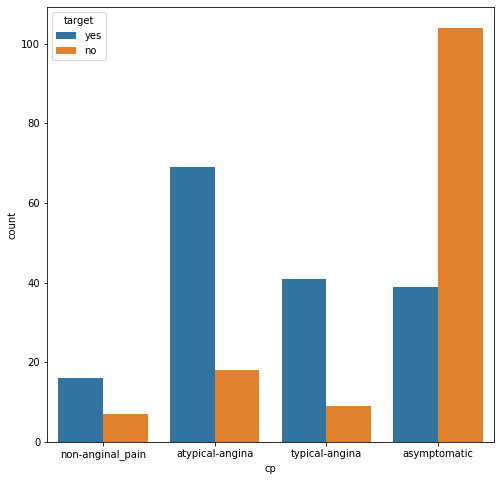

In [1462]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'cp', hue = 'target',data = dfvis);

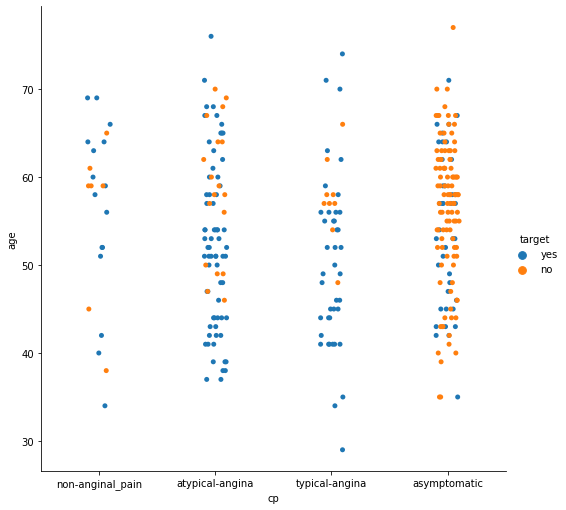

In [1463]:
sns.catplot(y = 'age', x='cp',hue = 'target',  data = dfvis, aspect = 1, height = 7);

As we can see, <b> atypical-angina </b> and <b>typical-angina </b> has the higher chance to cause heart disease.

### trestbps (Resting blood pressure)

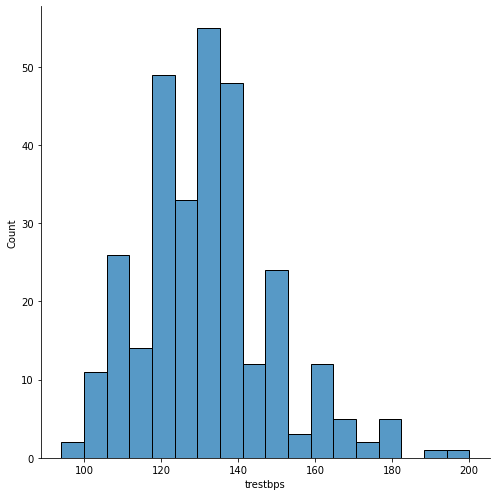

In [1464]:
sns.displot(x = 'trestbps', data = dfvis, aspect = 1, height = 7);

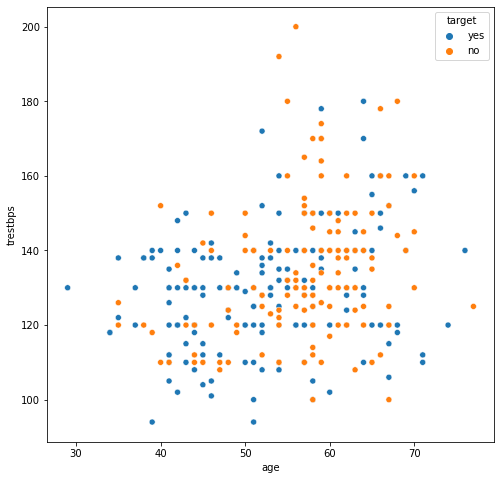

In [1465]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'age', y = 'trestbps',hue = 'target',data = dfvis);

<b> Checking its relation with Target

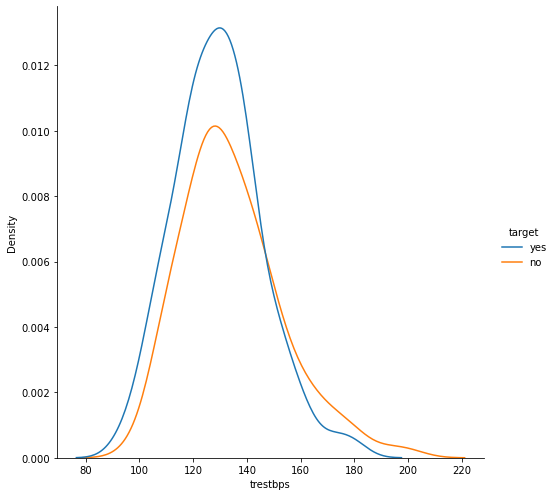

In [1466]:
sns.displot(x = 'trestbps', data = dfvis, hue= 'target', kind = 'kde',aspect = 1, height = 7);

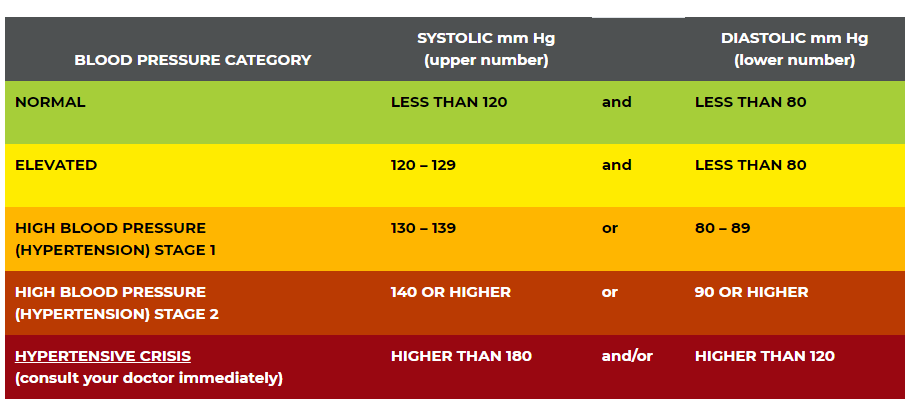

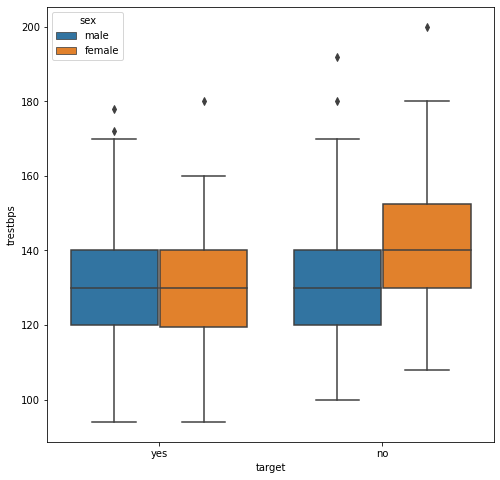

In [1467]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'trestbps',x='target', hue = 'sex', data = dfvis);

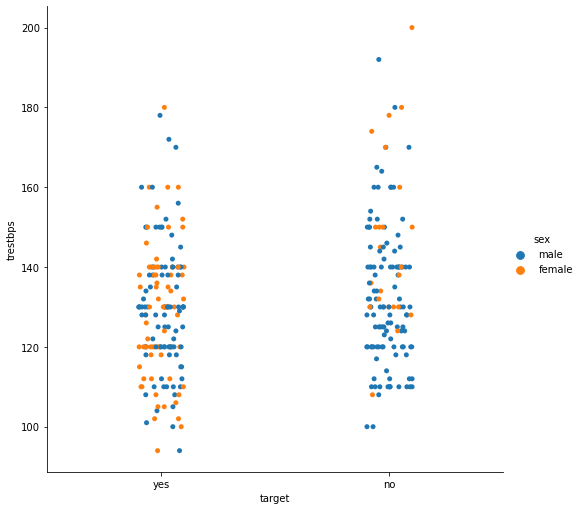

In [1468]:
sns.catplot(y = 'trestbps', x='target',hue = 'sex',  data = dfvis, aspect = 1, height = 7);

### chol (cholestrol)

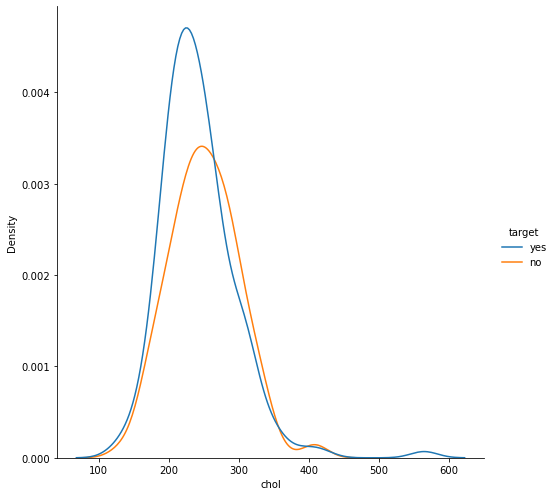

In [1469]:
sns.displot(x = 'chol', data = dfvis, hue= 'target', kind = 'kde',aspect = 1, height = 7);

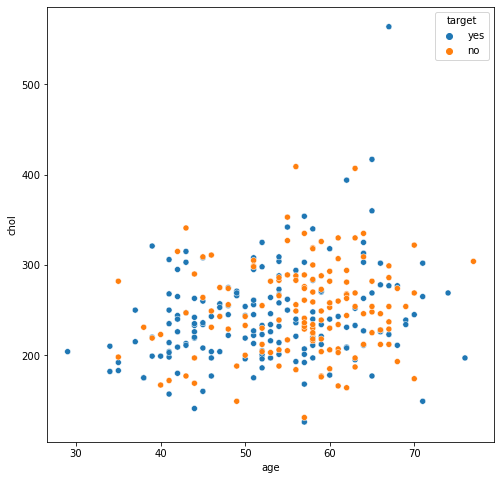

In [1470]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'age', y = 'chol',hue = 'target',data = dfvis);

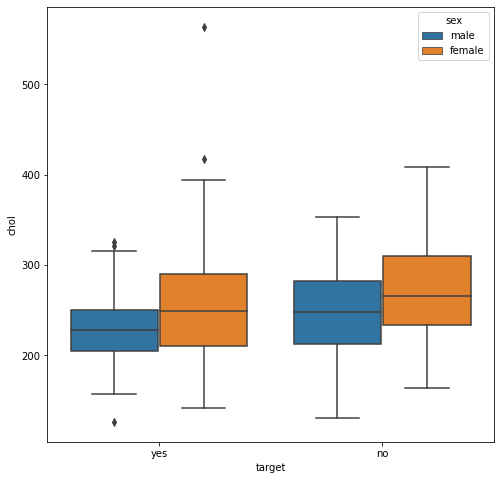

In [1471]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'chol',x='target',hue = 'sex',  data = dfvis);

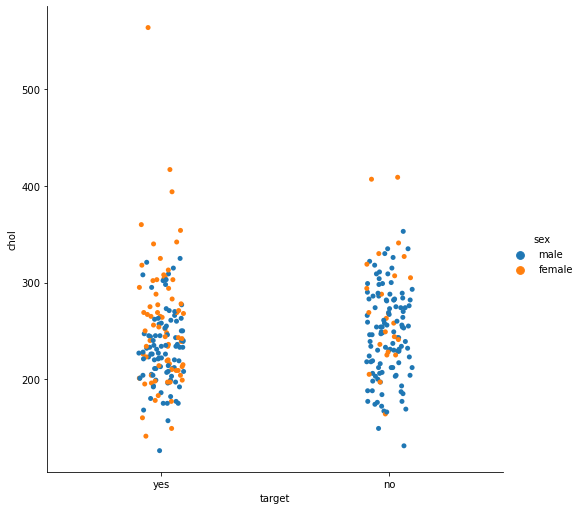

In [1472]:
sns.catplot(y = 'chol', x='target',hue = 'sex',  data = dfvis, aspect = 1, height = 7);

### fbs (fasting blood sugar)

In [1473]:
dfvis['fbs'].value_counts()

false    258
true      45
Name: fbs, dtype: int64

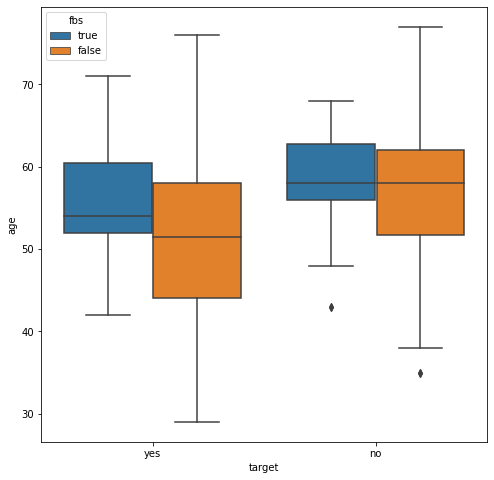

In [1474]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'age',x='target',hue = 'fbs',  data = dfvis);

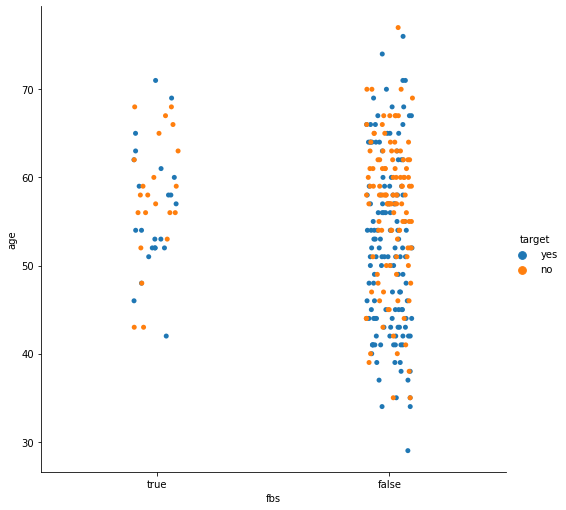

In [1475]:
sns.catplot(y = 'age', x='fbs',hue = 'target',  data = dfvis, aspect = 1, height = 7);

### thalach (Maximum Heart Rate Achieved)

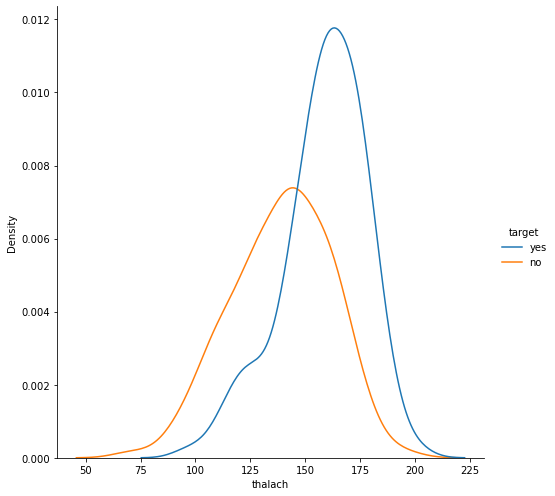

In [1476]:
sns.displot(x = 'thalach', data = dfvis, hue= 'target', kind = 'kde',aspect = 1, height = 7);

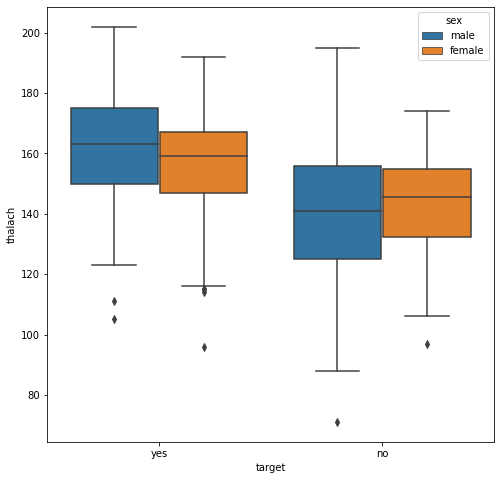

In [1477]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'thalach', x='target',hue = 'sex',  data = dfvis);

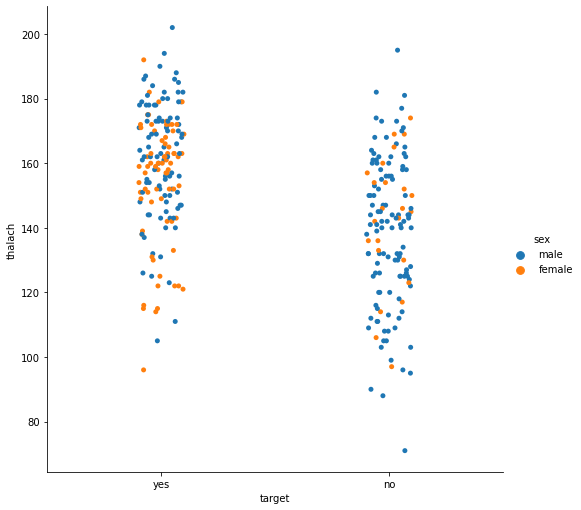

In [1478]:
sns.catplot(y = 'thalach', x='target',hue = 'sex',  data = dfvis, aspect = 1, height = 7);

### slope 
the slope of the peak exercise ST segment

In [1479]:
dfvis['slope'].value_counts()

up      142
flat    140
down     21
Name: slope, dtype: int64

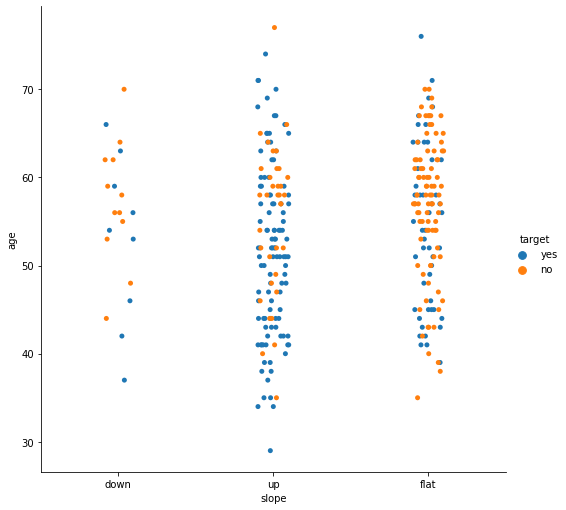

In [1480]:
sns.catplot(y = 'age', x='slope',hue = 'target',  data = dfvis, aspect = 1, height = 7);

# 4. Model Preparation
- 4.1 Encoding Categorical Features
- 4.2 Normalization
- 4.3 Split training and testing set

### 4.2 Split training and testing

In [1481]:
from sklearn.model_selection import train_test_split

In [1482]:
## Splitting original dataset (df) without normalization

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], test_size = 0.30, random_state = 42)

In [1498]:
## Original Data (df) with normalizing
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.drop('target', axis = 1), df['target'], test_size = 0.30, random_state = 42)

In [1499]:
## Outliers removed dataset (xdf) with normalization
X_train3, X_test3, y_train3, y_test3 = train_test_split(xdf.drop('target', axis = 1), xdf['target'], test_size = 0.30, random_state = 42)

If you are confused:
- <b> X_train = original dataset (no norm and no outlier removal)
- X_train2 = original datset (no outlier removal (df): with only norm)
- X_train3 = outlier removed dataset (xdf: with norm )

### 4.2 Normalization

In [1485]:
from sklearn.preprocessing import StandardScaler

In [1486]:
sc = StandardScaler()

In [1487]:
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.fit_transform(X_test3)


If you are confused, see this:
- <b>df = original dataset
- df_norm = original dataset with normalization
- xdf_norm = outliers removed dataset with normalization

# 5. Models and tuning

Since it is classification problem, we will test it with following algorithms
- <b> Logistic Regression
- Linear Regression
- Naive Bayes
- KNN 
- Decision Trees
- Random Forest
- SVM
  
    
We use <b> F1 Score, Precision, Recall, ROC Curve, Confusion Matrix </b> and <b> PR Curve </b> as the way to evaluate our models

In [1954]:
model_score = pd.DataFrame(columns = ("df","df_norm","xdf_norm"))

### Logistic Regression

In [1955]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

#### Original Dataset
(Without removing outliers and without normalizing)

In [1956]:
lrmodel = LogisticRegression(max_iter = 1000)

In [1957]:
lrmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1958]:
lrmodel.score(X_test, y_test)

0.8131868131868132

In [1959]:
lrscore1 = lrmodel.score(X_test, y_test)

In [1960]:
y_pred = lrmodel.predict(X_test)

In [1961]:
cm = confusion_matrix(y_test, y_pred)

In [1962]:
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[32  9]
 [ 8 42]]


In [1963]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Original Data 

Original Data (df) with normalizing i.e X_train2

In [1964]:
lrmodel2 = LogisticRegression(max_iter = 1000)

In [1965]:
lrmodel2.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000)

In [1966]:
lrmodel2.score(X_test2, y_test2)

0.8131868131868132

In [1967]:
scorelr2 =  lrmodel2.score(X_test2, y_test2)

In [1968]:
#### Confusion matrix for Dataset

In [1969]:
y_pred2 = lrmodel2.predict(X_test2)

In [1970]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred2)

In [1971]:
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[32  9]
 [ 8 42]]


In [1972]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



#### Outlier removed data (xdf)

Outlier removed data (xdf) with normalization (X_train3)

In [1973]:
lrmodel3 = LogisticRegression(max_iter = 1000)

In [1974]:
lrmodel3.fit(X_train3, y_train3)

LogisticRegression(max_iter=1000)

In [1975]:
lrmodel3.score(X_test3, y_test3)

0.8333333333333334

In [1976]:
y_pred3 = lrmodel3.predict(X_test3)

In [1977]:
cm = confusion_matrix(y_test3, y_pred3)

In [1978]:
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[26 10]
 [ 5 49]]


In [1979]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.83      0.91      0.87        54

    accuracy                           0.83        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.83      0.83      0.83        90



In [1980]:
model_score = model_score.append(pd.DataFrame({'df':[lrmodel.score(X_test,y_test)],'df_norm':[lrmodel2.score(X_test2,y_test2)], 'xdf_norm':[lrmodel3.score(X_test3, y_test3)]}, index = ['Logistic Regression']))

## Naive Bayes

In [1981]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [1982]:
naiveb = GaussianNB()

#### Original Data 

Original Data (df) with normalizing i.e X_train2

In [1983]:
naiveb.fit(X_train, y_train)

GaussianNB()

In [1984]:
naiveb.score(X_test, y_test)

0.8351648351648352

#### Original dataset (after norm) (X_train2)

In [1985]:
naiveb2 = GaussianNB()

In [1986]:
naiveb2.fit(X_train2, y_train2)

GaussianNB()

In [1987]:
naiveb2.score(X_test2, y_test2)

0.8351648351648352

#### Normalization dataset (xdf) (after norm)

In [1988]:
naiveb3 = GaussianNB()

In [1989]:
naiveb3.fit(X_train3, y_train3)

GaussianNB()

In [1990]:
naiveb3.score(X_test3, y_test3)

0.8111111111111111

In [1991]:
model_score = model_score.append(pd.DataFrame({'df':[naiveb.score(X_test,y_test)],'df_norm':[naiveb2.score(X_test2,y_test2)], 'xdf_norm':[naiveb3.score(X_test3, y_test3)]}, index = ['Naive Bayes']))

## K- Nearest Neighbour

In [1992]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [1993]:
knn = KNeighborsClassifier(n_neighbors = 7)

#### Original Data
Original Data (df) with normalizing i.e X_train2

In [1994]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [1995]:
knn.score(X_test, y_test)

0.6703296703296703

In [1996]:
knn_pred = knn.predict(X_test)

In [1997]:
print("Confusion Matrix: \n",confusion_matrix(y_test, knn_pred))

Confusion Matrix: 
 [[24 17]
 [13 37]]


In [1998]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_knn = knn.predict(X_test)
    error_rate.append(np.mean(pred_knn != y_test))

Text(0, 0.5, 'Error Rate')

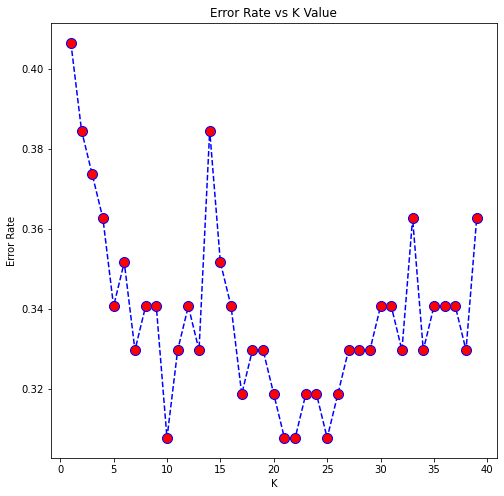

In [1999]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [2000]:
## let's chose the k-value

knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print(knn.score(X_test, y_test))

print("\n With k = 21")
print('\n')
print("Confusion Matrix: \n", confusion_matrix(y_test, pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))


0.6923076923076923

 With k = 21


Confusion Matrix: 
 [[27 14]
 [14 36]]


              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.72      0.72      0.72        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



#### Original Dataset after normalization

In [2001]:
knn2 = KNeighborsClassifier(n_neighbors = 7)

In [2002]:
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=7)

In [2003]:
knn2.score(X_test2, y_test2)

0.6703296703296703

In [2004]:
knn_pred2 = knn2.predict(X_test2)

In [2005]:
print("Confusion Matrix: \n",confusion_matrix(y_test2, knn_pred2))

Confusion Matrix: 
 [[24 17]
 [13 37]]


In [2006]:
error_rate = []

for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train2,y_train2)
    pred_knn2 = knn2.predict(X_test2)
    error_rate.append(np.mean(pred_knn2 != y_test2))

Text(0, 0.5, 'Error Rate')

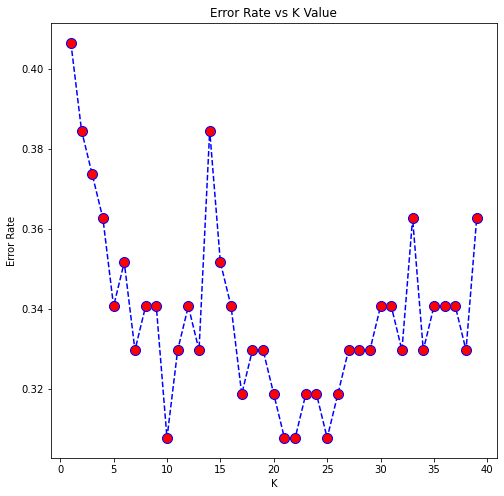

In [2007]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [2008]:
## let's chose the k-value

knn2 = KNeighborsClassifier(n_neighbors = 21)
knn2.fit(X_train2, y_train2)
pred_knn2 = knn2.predict(X_test2)
print(knn2.score(X_test2, y_test2))

print("\n With k = 21")
print('\n')
print("Confusion Matrix: \n", confusion_matrix(y_test2, pred_knn2))
print('\n')
print(classification_report(y_test2,pred_knn2))


0.6923076923076923

 With k = 21


Confusion Matrix: 
 [[27 14]
 [14 36]]


              precision    recall  f1-score   support

           0       0.66      0.66      0.66        41
           1       0.72      0.72      0.72        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



In [2009]:
#### Outliers removed dataset after normalization

In [2010]:
knn3 = KNeighborsClassifier(n_neighbors = 7)

In [2011]:
knn3.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=7)

In [2012]:
knn3.score(X_test3, y_test3)

0.6444444444444445

In [2013]:
knn_pred3 = knn.predict(X_test3)

In [2014]:
print("Confusion Matrix: \n",confusion_matrix(y_test3, knn_pred3))

Confusion Matrix: 
 [[20 16]
 [12 42]]


In [2015]:
error_rate = []

for i in range(1,40):
    knn3 = KNeighborsClassifier(n_neighbors = i)
    knn3.fit(X_train3,y_train3)
    pred_knn3 = knn3.predict(X_test3)
    error_rate.append(np.mean(pred_knn3 != y_test3))

Text(0, 0.5, 'Error Rate')

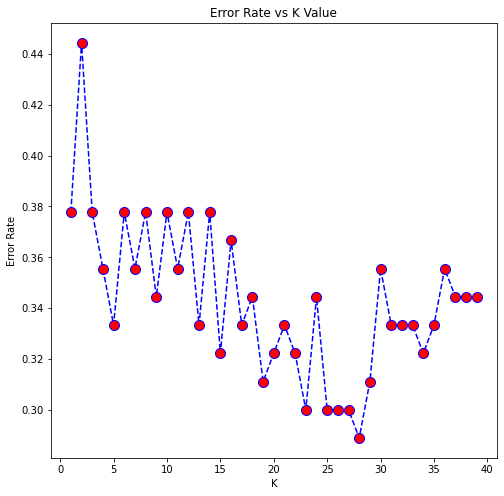

In [2016]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [2017]:
## let's chose the k-value

knn3 = KNeighborsClassifier(n_neighbors = 28)
knn3.fit(X_train3, y_train3)
pred_knn3 = knn.predict(X_test3)
print(knn3.score(X_test3, y_test3))

print("\n With k = 28")
print('\n')
print("Confusion Matrix: \n", confusion_matrix(y_test3, pred_knn3))
print('\n')
print(classification_report(y_test3,pred_knn3))


0.7111111111111111

 With k = 28


Confusion Matrix: 
 [[20 16]
 [12 42]]


              precision    recall  f1-score   support

           0       0.62      0.56      0.59        36
           1       0.72      0.78      0.75        54

    accuracy                           0.69        90
   macro avg       0.67      0.67      0.67        90
weighted avg       0.68      0.69      0.69        90



In [2018]:
model_score = model_score.append(pd.DataFrame({'df':[knn.score(X_test,y_test)],'df_norm':[knn2.score(X_test2,y_test2)], 'xdf_norm':[knn3.score(X_test3, y_test3)]}, index = ['KNN']))

#### Sorry it's taking more space 

.

## Decision Tree

In [2019]:
from sklearn.tree import DecisionTreeClassifier

In [2020]:
dt = DecisionTreeClassifier()

#### original data

In [2021]:
dt = dt.fit(X_train, y_train)

In [2022]:
dt_pred = dt.predict(X_test)

In [2023]:
print("Accuracy:", metrics.accuracy_score(y_test, dt_pred))

Accuracy: 0.7362637362637363


In [2024]:
dtcm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix: \n", dtcm)

Confusion Matrix: 
 [[33  8]
 [16 34]]


#### original data (after norm)

In [2025]:
dt2 = DecisionTreeClassifier()

In [2026]:
dt2 = dt.fit(X_train2, y_train2)

In [2027]:
dt2.score(X_test2, y_test2)

0.7252747252747253

In [2028]:
dt_pred2 = dt2.predict(X_test2)

In [2029]:
dtcm = confusion_matrix(y_test2, dt_pred2)
print("Confusion Matrix: \n", dtcm)

Confusion Matrix: 
 [[33  8]
 [17 33]]


#### outliers removed data after norm

In [2030]:
dt3 = DecisionTreeClassifier()

In [2031]:
dt3 = dt3.fit(X_train3, y_train3)

In [2032]:
dt3.score(X_test3, y_test3)

0.8222222222222222

In [2033]:
dt_pred3 = dt.predict(X_test3)

In [2034]:
dtcm = confusion_matrix(y_test3, dt_pred3)
print("Confusion Matrix: \n", dtcm)

Confusion Matrix: 
 [[32  4]
 [ 9 45]]


In [2035]:
model_score = model_score.append(pd.DataFrame({'df':[dt.score(X_test,y_test)],'df_norm':[dt2.score(X_test2,y_test2)], 'xdf_norm':[dt3.score(X_test3, y_test3)]}, index = ['Decision Trees']))

## Random Forest

In [2036]:
from sklearn.ensemble import RandomForestClassifier

In [2037]:
rfclf = RandomForestClassifier(n_estimators = 100)

#### With original Dataset

In [2038]:
rfclf.fit(X_train, y_train)

RandomForestClassifier()

In [2039]:
rfclf.score(X_test, y_test)

0.8241758241758241

In [2040]:
rf_pred = rfclf.predict(X_test)

In [2041]:
print("Confusion Matrix:\n",confusion_matrix(y_test, rf_pred))

Confusion Matrix:
 [[32  9]
 [ 7 43]]


#### With Original dataset after normalizaing

In [2042]:
rfclf2 = RandomForestClassifier(n_estimators = 100)

In [2043]:
rfclf2 = RandomForestClassifier(n_estimators = 100)

In [2044]:
rfclf2.fit(X_train2, y_train2)

RandomForestClassifier()

In [2045]:
rfclf2.score(X_test2, y_test2)

0.8241758241758241

In [2046]:
rf_pred = rfclf2.predict(X_test2)

In [2047]:
print("Confusion Matrix:\n",confusion_matrix(y_test2, rf_pred))

Confusion Matrix:
 [[32  9]
 [ 7 43]]


#### With Outlier removed dataset after normalizaing

In [2048]:
rfclf3 = RandomForestClassifier(n_estimators = 100)

In [2049]:
rfclf3 = RandomForestClassifier(n_estimators = 100)

In [2050]:
rfclf3.fit(X_train3, y_train3)

RandomForestClassifier()

In [2051]:
rfclf3.score(X_test3, y_test3)

0.8333333333333334

In [2052]:
rf_pred = rfclf3.predict(X_test3)

In [2053]:
print("Confusion Matrix:\n",confusion_matrix(y_test3, rf_pred))

Confusion Matrix:
 [[26 10]
 [ 5 49]]


In [2054]:
model_score = model_score.append(pd.DataFrame({'df':[rfclf.score(X_test,y_test)],'df_norm':[rfclf2.score(X_test2,y_test2)], 'xdf_norm':[rfclf3.score(X_test3, y_test3)]}, index = ['Random Forest']))

## Support Vector Machine

In [2055]:
from sklearn import svm

#### With original dataset before norm(df)

In [2056]:
clf_svm = svm.SVC(kernel='linear')

In [2057]:
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [2058]:
clf_svm.score(X_test, y_test)

0.8131868131868132

In [2059]:
svm_pred = clf_svm.predict(X_test)

In [2060]:
print("Confusion Matrix:\n",confusion_matrix(y_test, svm_pred))

Confusion Matrix:
 [[32  9]
 [ 8 42]]


#### With original dataset after norm 

In [2061]:
clf_svm2 = svm.SVC(kernel='linear')

In [2062]:
clf_svm2.fit(X_train2, y_train2)

SVC(kernel='linear')

In [2063]:
clf_svm2.score(X_test2, y_test2)

0.8131868131868132

In [2064]:
svm_pred2 = clf_svm2.predict(X_test2)

In [2065]:
print("Confusion Matrix:\n",confusion_matrix(y_test2, svm_pred2))

Confusion Matrix:
 [[32  9]
 [ 8 42]]


#### Outliers removed Dataset after Norm

In [2066]:
clf_svm3 = svm.SVC(kernel='linear')

In [2067]:
clf_svm3.fit(X_train3, y_train3)

SVC(kernel='linear')

In [2068]:
clf_svm3.score(X_test3, y_test3)

0.7888888888888889

In [2069]:
svm_pred3 = clf_svm3.predict(X_test3)

In [2070]:
print("Confusion Matrix:\n",confusion_matrix(y_test3, svm_pred3))

Confusion Matrix:
 [[24 12]
 [ 7 47]]


In [2071]:
model_score = model_score.append(pd.DataFrame({'df':[clf_svm.score(X_test,y_test)],'df_norm':[clf_svm2.score(X_test2,y_test2)], 'xdf_norm':[clf_svm3.score(X_test3, y_test3)]}, index = ['SVM']))

### We know

- <b> df = original dataset (without norm and without removing outliers)
- df_norm = original dataset without removing outliers with normalization
- xdf_norm = dataset after removing outliers and normalization


In [2073]:
model_score

,df,df_norm,xdf_norm
Logistic Regression,0.813187,0.813187,0.833333
Naive Bayes,0.835165,0.835165,0.811111
KNN,0.692308,0.692308,0.711111
Decision Trees,0.725275,0.725275,0.822222
Random Forest,0.824176,0.824176,0.833333
SVM,0.813187,0.813187,0.788889


We can clearly see, 
- <b> Logistic Regression </b> : has higher accuracy after normalization *xdf_norm*
- <b> Naive Bayes </b> : has higher accuracy before normalization *df*
- <b> KNN </b> : has higher accuracy after normalization *xdf_norm*
- <b> Decision Trees </b> : has higher accuracy has higher accuracy after normalization
- <b> Random Forest </b> : higher accuracy after normalization
- <b> SVM </b> : higher accuracy before normalization

We couldn't get more accuracy as data was quite less